<a href="https://colab.research.google.com/github/MostaryKhatun/Thesis/blob/main/Ml_model_for_stabdard_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Upload your dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Standard_for_all_dataset.csv to Standard_for_all_dataset.csv


Step 2: Train the model and save it

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import os
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset
dataset_path = '/content/Standard_for_all_dataset.csv'  # Assuming the dataset was uploaded

# Check if the file exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}")

dataset = pd.read_csv(dataset_path)

# Check if the target column exists
if 'Production_%' not in dataset.columns:
    raise KeyError("The column 'Egg_production_percentage' is missing from the dataset.")

# Prepare features (X) and target (y)
X = dataset.drop(columns=['Production_%'])
y = dataset['Production_%']

# Convert categorical columns to numeric codes if necessary
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = X[col].astype('category').cat.codes

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train different models and evaluate their performance
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_y_pred = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
svr_y_pred = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

# Store models in a dictionary
models = {
    'RandomForest': {'model': rf_model, 'mse': rf_mse, 'r2': rf_r2},
    'LinearRegression': {'model': lr_model, 'mse': lr_mse, 'r2': lr_r2},
    'SVR': {'model': svr_model, 'mse': svr_mse, 'r2': svr_r2},
}

# Select the best model based on Mean Squared Error
best_model_name = min(models, key=lambda x: models[x]['mse'])
best_model = models[best_model_name]['model']

# Save the best model and scaler
model_path = '/content/egg_model.sav'
scaler_path = '/content/scaler.sav'

with open(model_path, 'wb') as model_file:
    pickle.dump(best_model, model_file)

with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print(f"Best model: {best_model_name} with MSE: {models[best_model_name]['mse']} and R2: {models[best_model_name]['r2']}")
print(f"Models saved as {model_path} and {scaler_path}")


Best model: RandomForest with MSE: 3.884766666666667 and R2: 0.9974892393498608
Models saved as /content/egg_model.sav and /content/scaler.sav


Step 3: Make predictions with the trained model
Once the model and scaler are saved, you can use them for making predictions.

In [7]:
# Check column names
dataset = pd.read_csv('/content/Standard_for_all_dataset.csv')
print("Columns in the dataset:", dataset.columns)

# Ensure you are including all necessary input features
inputs = [
    float(input("Enter age in weeks: ")),
    float(input("Enter feed quantity: ")),
    float(input("Enter water quantity: ")),
    float(input("Enter bodyweight: ")),
    float(input("Enter lighting condition (e.g., hours per day): ")),
    float(input("Enter any missing feature (if required, e.g., temperature): "))  # Add the missing feature here
]

# Scale the inputs
scaled_inputs = scaler.transform([inputs])

# Make prediction
prediction = model.predict(scaled_inputs)[0]
print(f"Predicted Egg Production Percentage: {prediction}")


Columns in the dataset: Index(['Age_week', 'Consumption_feed_g_per_bird_per_day',
       'Consumption_water_g_per_bird_per_day', 'Vaccination ', 'Bodyweight_g',
       'Lighting_duration_production_hours_per_day', 'Production_%'],
      dtype='object')
Enter age in weeks: 80
Enter feed quantity: 115
Enter water quantity: 230
Enter bodyweight: 1920
Enter lighting condition (e.g., hours per day): 17
Enter any missing feature (if required, e.g., temperature): 25
Predicted Egg Production Percentage: 65.74


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


again

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import os
from sklearn.metrics import mean_squared_error, r2_score

# Function to train the model
def train_model(dataset_path, model_path, scaler_path):
    try:
        # Check if dataset exists
        if not os.path.exists(dataset_path):
            raise FileNotFoundError(f"Dataset not found at {dataset_path}")

        # Load the dataset
        dataset = pd.read_csv(dataset_path)

        # Check if the target column exists
        if 'Production_%' not in dataset.columns:
            raise KeyError("The column 'Production_%' is missing from the dataset.")

        # Feature and target separation
        X = dataset.drop(columns=['Production_%'])
        y = dataset['Production_%']

        # Convert categorical columns to numeric (if any)
        categorical_columns = X.select_dtypes(include=['object']).columns
        for col in categorical_columns:
            X[col] = X[col].astype('category').cat.codes

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train different models
        rf_model = RandomForestRegressor(random_state=42)
        rf_model.fit(X_train_scaled, y_train)
        rf_y_pred_rf = rf_model.predict(X_test_scaled)
        rf_mse = mean_squared_error(y_test, rf_y_pred_rf)
        rf_r2 = r2_score(y_test, rf_y_pred_rf)

        lr_model = LinearRegression()
        lr_model.fit(X_train_scaled, y_train)
        lr_y_pred_lr = lr_model.predict(X_test_scaled)
        lr_mse = mean_squared_error(y_test, lr_y_pred_lr)
        lr_r2 = r2_score(y_test, lr_y_pred_lr)

        svr_model = SVR()
        svr_model.fit(X_train_scaled, y_train)
        svr_y_pred_svr = svr_model.predict(X_test_scaled)
        svr_mse = mean_squared_error(y_test, svr_y_pred_svr)
        svr_r2 = r2_score(y_test, svr_y_pred_svr)

        # Select the best model based on MSE
        models = {
            'RandomForest': {'model': rf_model, 'mse': rf_mse, 'r2': rf_r2},
            'LinearRegression': {'model': lr_model, 'mse': lr_mse, 'r2': lr_r2},
            'SVR': {'model': svr_model, 'mse': svr_mse, 'r2': svr_r2},
        }

        # Get the model with the lowest MSE
        best_model_name = min(models, key=lambda x: models[x]['mse'])
        best_model = models[best_model_name]['model']

        # Save the best model and the scaler
        with open(model_path, 'wb') as model_file:
            pickle.dump(best_model, model_file)

        with open(scaler_path, 'wb') as scaler_file:
            pickle.dump(scaler, scaler_file)

        print(f"Model trained and saved successfully! Best model: {best_model_name} with MSE: {models[best_model_name]['mse']}")

    except Exception as e:
        print(f"Error during training: {e}")
        raise

# Function to make a prediction
def predict_model(input_data, model_path, scaler_path):
    try:
        # Check if the model and scaler exist
        if not os.path.exists(model_path) or not os.path.exists(scaler_path):
            raise FileNotFoundError("Model or scaler file not found. Please train the model first.")

        # Load the model and scaler
        model = pickle.load(open(model_path, 'rb'))
        scaler = pickle.load(open(scaler_path, 'rb'))

        # Ensure input data has the correct format
        if len(input_data) != 5:
            raise ValueError("Input data must have exactly 5 features.")

        # Scale the input data
        scaled_inputs = scaler.transform([input_data])

        # Make the prediction
        prediction = model.predict(scaled_inputs)[0]

        # Return the prediction
        return prediction

    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

# Example usage:
dataset_path = '/content/Standard_for_all_dataset.csv'  # Path to your dataset in Colab
model_path = '/content/egg_model.sav'  # Path to save the trained model
scaler_path = '/content/scaler.sav'  # Path to save the scaler

# Training the model
train_model(dataset_path, model_path, scaler_path)

# Predicting with new inputs
inputs = [80, 115, 230, 1920, 17]  # Example input: age, feed, water, bodyweight, lighting
prediction = predict_model(inputs, model_path, scaler_path)

if prediction is not None:
    print(f"Predicted Egg Production: {prediction}%")
else:
    print("Prediction failed.")


Model trained and saved successfully! Best model: RandomForest with MSE: 5.0410666666666675
Error during prediction: X has 5 features, but StandardScaler is expecting 6 features as input.
Prediction failed.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import os
from sklearn.metrics import mean_squared_error, r2_score

# Function to train the model
def train_model(dataset_path, model_path, scaler_path):
    try:
        # Check if dataset exists
        if not os.path.exists(dataset_path):
            raise FileNotFoundError(f"Dataset not found at {dataset_path}")

        # Load the dataset
        dataset = pd.read_csv(dataset_path)

        # Check if the target column exists
        if 'Production_%' not in dataset.columns:
            raise KeyError("The column 'Production_%' is missing from the dataset.")

        # Feature and target separation
        X = dataset.drop(columns=['Production_%'])
        y = dataset['Production_%']

        # Convert categorical columns to numeric (if any)
        categorical_columns = X.select_dtypes(include=['object']).columns
        for col in categorical_columns:
            X[col] = X[col].astype('category').cat.codes

        # Check the number of features
        print("Training features (X) shape:", X.shape)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train different models
        rf_model = RandomForestRegressor(random_state=42)
        rf_model.fit(X_train_scaled, y_train)
        rf_y_pred_rf = rf_model.predict(X_test_scaled)
        rf_mse = mean_squared_error(y_test, rf_y_pred_rf)
        rf_r2 = r2_score(y_test, rf_y_pred_rf)

        lr_model = LinearRegression()
        lr_model.fit(X_train_scaled, y_train)
        lr_y_pred_lr = lr_model.predict(X_test_scaled)
        lr_mse = mean_squared_error(y_test, lr_y_pred_lr)
        lr_r2 = r2_score(y_test, lr_y_pred_lr)

        svr_model = SVR()
        svr_model.fit(X_train_scaled, y_train)
        svr_y_pred_svr = svr_model.predict(X_test_scaled)
        svr_mse = mean_squared_error(y_test, svr_y_pred_svr)
        svr_r2 = r2_score(y_test, svr_y_pred_svr)

        # Select the best model based on MSE
        models = {
            'RandomForest': {'model': rf_model, 'mse': rf_mse, 'r2': rf_r2},
            'LinearRegression': {'model': lr_model, 'mse': lr_mse, 'r2': lr_r2},
            'SVR': {'model': svr_model, 'mse': svr_mse, 'r2': svr_r2},
        }

        # Get the model with the lowest MSE
        best_model_name = min(models, key=lambda x: models[x]['mse'])
        best_model = models[best_model_name]['model']

        # Save the best model and the scaler
        with open(model_path, 'wb') as model_file:
            pickle.dump(best_model, model_file)

        with open(scaler_path, 'wb') as scaler_file:
            pickle.dump(scaler, scaler_file)

        print(f"Model trained and saved successfully! Best model: {best_model_name} with MSE: {models[best_model_name]['mse']}")

    except Exception as e:
        print(f"Error during training: {e}")
        raise

# Function to make a prediction
def predict_model(input_data, model_path, scaler_path):
    try:
        # Check if the model and scaler exist
        if not os.path.exists(model_path) or not os.path.exists(scaler_path):
            raise FileNotFoundError("Model or scaler file not found. Please train the model first.")

        # Load the model and scaler
        model = pickle.load(open(model_path, 'rb'))
        scaler = pickle.load(open(scaler_path, 'rb'))

        # Ensure input data has the correct format
        if len(input_data) != 6:  # Change to 6 if the model expects 6 features
            raise ValueError("Input data must have exactly 6 features.")

        # Scale the input data
        scaled_inputs = scaler.transform([input_data])

        # Make the prediction
        prediction = model.predict(scaled_inputs)[0]

        # Return the prediction
        return prediction

    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

# Example usage:
dataset_path = '/content/Standard_for_all_dataset.csv'  # Path to your dataset in Colab
model_path = '/content/egg_model.sav'  # Path to save the trained model
scaler_path = '/content/scaler.sav'  # Path to save the scaler

# Training the model (Run this once to train the model)
train_model(dataset_path, model_path, scaler_path)

# Manual input for prediction
age_week = float(input("Enter age in weeks: "))
feed = float(input("Enter feed quantity: "))
water = float(input("Enter water quantity: "))
bodyweight = float(input("Enter bodyweight: "))
lighting = float(input("Enter lighting condition (hours per day): "))

# Input the data into the model for prediction
inputs = [age_week, feed, water, bodyweight, lighting, 0]  # Add a placeholder for the missing feature
# Add a missing feature value (e.g., location, season) if applicable.
prediction = predict_model(inputs, model_path, scaler_path)

if prediction is not None:
    print(f"Predicted Egg Production: {prediction}%")
else:
    print("Prediction failed.")


Training features (X) shape: (90, 6)
Model trained and saved successfully! Best model: RandomForest with MSE: 5.0410666666666675
Enter age in weeks: 80
Enter feed quantity: 115
Enter water quantity: 230
Enter bodyweight: 1920
Enter lighting condition (hours per day): 17
Predicted Egg Production: 59.34%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import os
from sklearn.metrics import mean_squared_error, r2_score

# Function to train the model
def train_model(dataset_path, model_path, scaler_path):
    try:
        # Check if dataset exists
        if not os.path.exists(dataset_path):
            raise FileNotFoundError(f"Dataset not found at {dataset_path}")

        # Load the dataset
        dataset = pd.read_csv(dataset_path)

        # Check if the target column exists
        if 'Production_%' not in dataset.columns:
            raise KeyError("The column 'Production_%' is missing from the dataset.")

        # Feature and target separation
        X = dataset.drop(columns=['Production_%'])
        y = dataset['Production_%']

        # Convert categorical columns to numeric (if any)
        categorical_columns = X.select_dtypes(include=['object']).columns
        for col in categorical_columns:
            X[col] = X[col].astype('category').cat.codes

        # Check the number of features
        print("Training features (X) shape:", X.shape)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train different models
        rf_model = RandomForestRegressor(random_state=42)
        rf_model.fit(X_train_scaled, y_train)
        rf_y_pred_rf = rf_model.predict(X_test_scaled)
        rf_mse = mean_squared_error(y_test, rf_y_pred_rf)
        rf_r2 = r2_score(y_test, rf_y_pred_rf)

        lr_model = LinearRegression()
        lr_model.fit(X_train_scaled, y_train)
        lr_y_pred_lr = lr_model.predict(X_test_scaled)
        lr_mse = mean_squared_error(y_test, lr_y_pred_lr)
        lr_r2 = r2_score(y_test, lr_y_pred_lr)

        svr_model = SVR()
        svr_model.fit(X_train_scaled, y_train)
        svr_y_pred_svr = svr_model.predict(X_test_scaled)
        svr_mse = mean_squared_error(y_test, svr_y_pred_svr)
        svr_r2 = r2_score(y_test, svr_y_pred_svr)

        # Select the best model based on MSE
        models = {
            'RandomForest': {'model': rf_model, 'mse': rf_mse, 'r2': rf_r2},
            'LinearRegression': {'model': lr_model, 'mse': lr_mse, 'r2': lr_r2},
            'SVR': {'model': svr_model, 'mse': svr_mse, 'r2': svr_r2},
        }

        # Get the model with the lowest MSE
        best_model_name = min(models, key=lambda x: models[x]['mse'])
        best_model = models[best_model_name]['model']

        # Save the best model and the scaler
        with open(model_path, 'wb') as model_file:
            pickle.dump(best_model, model_file)

        with open(scaler_path, 'wb') as scaler_file:
            pickle.dump(scaler, scaler_file)

        print(f"Model trained and saved successfully! Best model: {best_model_name} with MSE: {models[best_model_name]['mse']}")

    except Exception as e:
        print(f"Error during training: {e}")
        raise

# Function to make a prediction
def predict_model(input_data, model_path, scaler_path, actual_value=None):
    try:
        # Check if the model and scaler exist
        if not os.path.exists(model_path) or not os.path.exists(scaler_path):
            raise FileNotFoundError("Model or scaler file not found. Please train the model first.")

        # Load the model and scaler
        model = pickle.load(open(model_path, 'rb'))
        scaler = pickle.load(open(scaler_path, 'rb'))

        # Ensure input data has the correct format
        if len(input_data) != 6:  # Change to 6 if the model expects 6 features
            raise ValueError("Input data must have exactly 6 features.")

        # Scale the input data
        scaled_inputs = scaler.transform([input_data])

        # Make the prediction
        prediction = model.predict(scaled_inputs)[0]

        # Check if the predicted value is greater than the actual value
        if actual_value is not None and prediction > actual_value:
            print(f"Prediction is greater than the actual value! Predicted: {prediction}% > Actual: {actual_value}%")
        else:
            print(f"Predicted Egg Production: {prediction}%")

        # Return the prediction
        return prediction

    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

# Example usage:
dataset_path = '/content/Standard_for_all_dataset.csv'  # Path to your dataset in Colab
model_path = '/content/egg_model.sav'  # Path to save the trained model
scaler_path = '/content/scaler.sav'  # Path to save the scaler

# Training the model (Run this once to train the model)
train_model(dataset_path, model_path, scaler_path)

# Manual input for prediction
age_week = float(input("Enter age in weeks: "))
feed = float(input("Enter feed quantity: "))
water = float(input("Enter water quantity: "))
bodyweight = float(input("Enter bodyweight: "))
lighting = float(input("Enter lighting condition (hours per day): "))
actual_value = float(input("Enter the actual egg production percentage: "))  # Actual value for comparison

# Input the data into the model for prediction
inputs = [age_week, feed, water, bodyweight, lighting, 0]  # Add a placeholder for the missing feature
# Add a missing feature value (e.g., location, season) if applicable.
prediction = predict_model(inputs, model_path, scaler_path, actual_value)

if prediction is not None:
    print(f"Predicted Egg Production: {prediction}%")
else:
    print("Prediction failed.")


Training features (X) shape: (90, 6)
Model trained and saved successfully! Best model: RandomForest with MSE: 5.0410666666666675
Enter age in weeks: 80
Enter feed quantity: 115
Enter water quantity: 230
Enter bodyweight: 1920
Enter lighting condition (hours per day): 17
Enter the actual egg production percentage: 72
Predicted Egg Production: 59.34%
Predicted Egg Production: 59.34%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
import os
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to train the model
def train_model(dataset_path, model_path, scaler_path):
    try:
        if not os.path.exists(dataset_path):
            raise FileNotFoundError(f"Dataset not found at {dataset_path}")

        # Load the dataset
        dataset = pd.read_csv(dataset_path)

        if 'Production_%' not in dataset.columns:
            raise KeyError("The column 'Production_%' is missing from the dataset.")

        # Feature and target separation
        X = dataset.drop(columns=['Production_%'])
        y = dataset['Production_%']

        # Convert categorical columns to numeric (if any)
        categorical_columns = X.select_dtypes(include=['object']).columns
        for col in categorical_columns:
            X[col] = X[col].astype('category').cat.codes

        # Save feature names for consistent input handling
        feature_names = X.columns.tolist()

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train Random Forest model
        rf_model = RandomForestRegressor(random_state=42)
        rf_model.fit(X_train_scaled, y_train)

        # Save the model, scaler, and feature names
        with open(model_path, 'wb') as model_file:
            pickle.dump(rf_model, model_file)
        with open(scaler_path, 'wb') as scaler_file:
            pickle.dump(scaler, scaler_file)

        feature_path = os.path.splitext(model_path)[0] + '_features.pkl'
        with open(feature_path, 'wb') as feature_file:
            pickle.dump(feature_names, feature_file)

        print("Model trained and saved successfully!")

    except Exception as e:
        print(f"Error during training: {e}")
        raise

# Function to make a prediction
def predict_model(model_path, scaler_path):
    try:
        # Input values manually
        input_data = {
            'Age_week': float(input("Enter age in weeks: ")),
            'Consumption_feed_g_per_bird_per_day': float(input("Enter feed quantity: ")),
            'Consumption_water_g_per_bird_per_day': float(input("Enter water quantity: ")),
            'Bodyweight_g': float(input("Enter bodyweight: ")),
            'Lighting_duration_production_hours_per_day': float(input("Enter lighting condition (hours per day): ")),
        }

        # Load model, scaler, and feature names
        model = pickle.load(open(model_path, 'rb'))
        scaler = pickle.load(open(scaler_path, 'rb'))

        feature_path = os.path.splitext(model_path)[0] + '_features.pkl'
        feature_names = pickle.load(open(feature_path, 'rb'))

        # Ensure all features are present in the input
        for feature in feature_names:
            if feature not in input_data:
                input_data[feature] = 0  # Default value for missing features (e.g., 'Vaccination')

        # Ensure the input data matches the training feature order
        input_df = pd.DataFrame([input_data])[feature_names]

        # Scale the input data
        scaled_inputs = scaler.transform(input_df)

        # Make the prediction
        prediction = model.predict(scaled_inputs)[0]

        print(f"Predicted Egg Production: {prediction}%")
        return prediction

    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

# Example usage
dataset_path = '/content/Standard_for_all_dataset.csv'
model_path = '/content/egg_model.sav'
scaler_path = '/content/scaler.sav'

# Train the model
train_model(dataset_path, model_path, scaler_path)

# Predict manually
predict_model(model_path, scaler_path)


Model trained and saved successfully!
Enter age in weeks: 75
Enter feed quantity: 115
Enter water quantity: 230
Enter bodyweight: 1910
Enter lighting condition (hours per day): 17
Predicted Egg Production: 76.26%


76.26

visualization

Random Forest Model MSE: 5.0410666666666675, R2: 0.9967419119583171
Model trained and saved successfully!


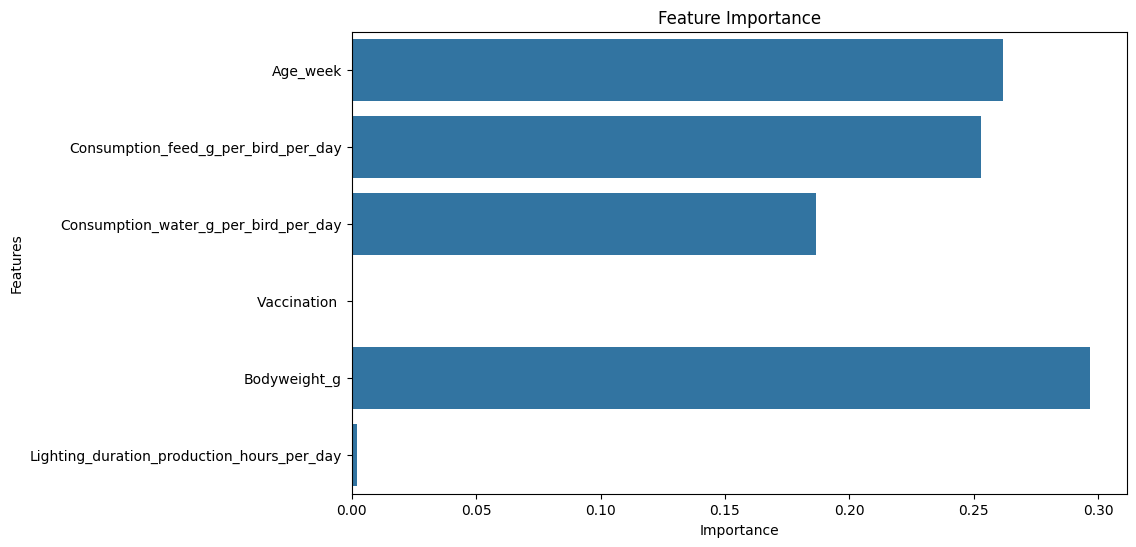

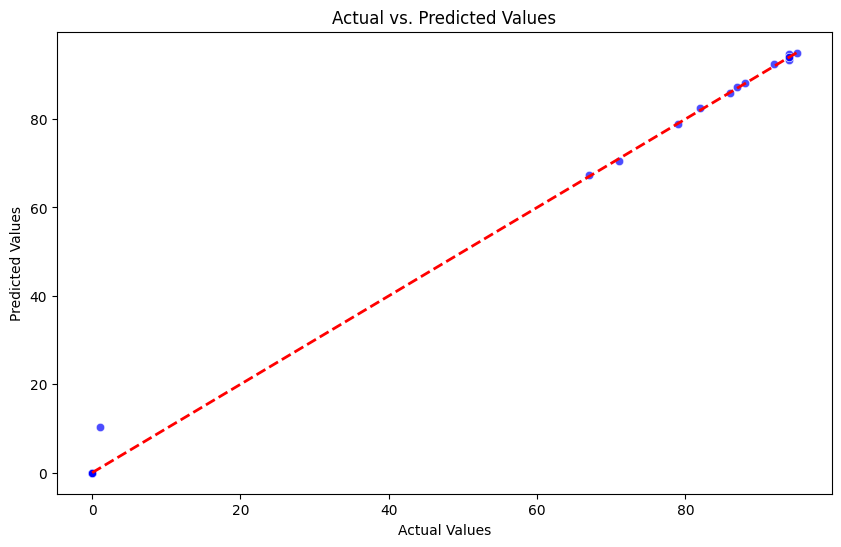

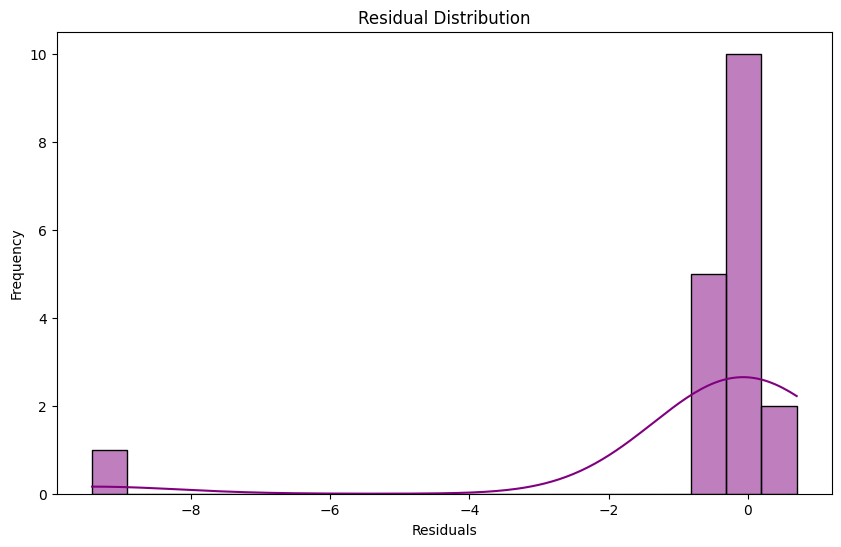

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import os

# Function to train the model and visualize
def train_and_visualize(dataset_path, model_path, scaler_path):
    try:
        if not os.path.exists(dataset_path):
            raise FileNotFoundError(f"Dataset not found at {dataset_path}")

        # Load the dataset
        dataset = pd.read_csv(dataset_path)

        if 'Production_%' not in dataset.columns:
            raise KeyError("The column 'Production_%' is missing from the dataset.")

        # Feature and target separation
        X = dataset.drop(columns=['Production_%'])
        y = dataset['Production_%']

        # Convert categorical columns to numeric (if any)
        categorical_columns = X.select_dtypes(include=['object']).columns
        for col in categorical_columns:
            X[col] = X[col].astype('category').cat.codes

        # Save feature names
        feature_names = X.columns.tolist()

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train Random Forest model
        rf_model = RandomForestRegressor(random_state=42)
        rf_model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = rf_model.predict(X_test_scaled)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"Random Forest Model MSE: {mse}, R2: {r2}")

        # Save the model, scaler, and feature names
        with open(model_path, 'wb') as model_file:
            pickle.dump(rf_model, model_file)
        with open(scaler_path, 'wb') as scaler_file:
            pickle.dump(scaler, scaler_file)

        feature_path = os.path.splitext(model_path)[0] + '_features.pkl'
        with open(feature_path, 'wb') as feature_file:
            pickle.dump(feature_names, feature_file)

        print("Model trained and saved successfully!")

        # Visualization
        # 1. Feature Importance
        feature_importances = rf_model.feature_importances_
        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importances, y=feature_names)
        plt.title('Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.show()

        # 2. Actual vs. Predicted Values
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)  # Perfect prediction line
        plt.title('Actual vs. Predicted Values')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.show()

        # 3. Residual Plot
        residuals = y_test - y_pred
        plt.figure(figsize=(10, 6))
        sns.histplot(residuals, kde=True, bins=20, color='purple')
        plt.title('Residual Distribution')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.show()

    except Exception as e:
        print(f"Error during training: {e}")
        raise

# Example usage
dataset_path = '/content/Standard_for_all_dataset.csv'
model_path = '/content/egg_model.sav'
scaler_path = '/content/scaler.sav'

# Train and visualize
train_and_visualize(dataset_path, model_path, scaler_path)


visulization train data into target data

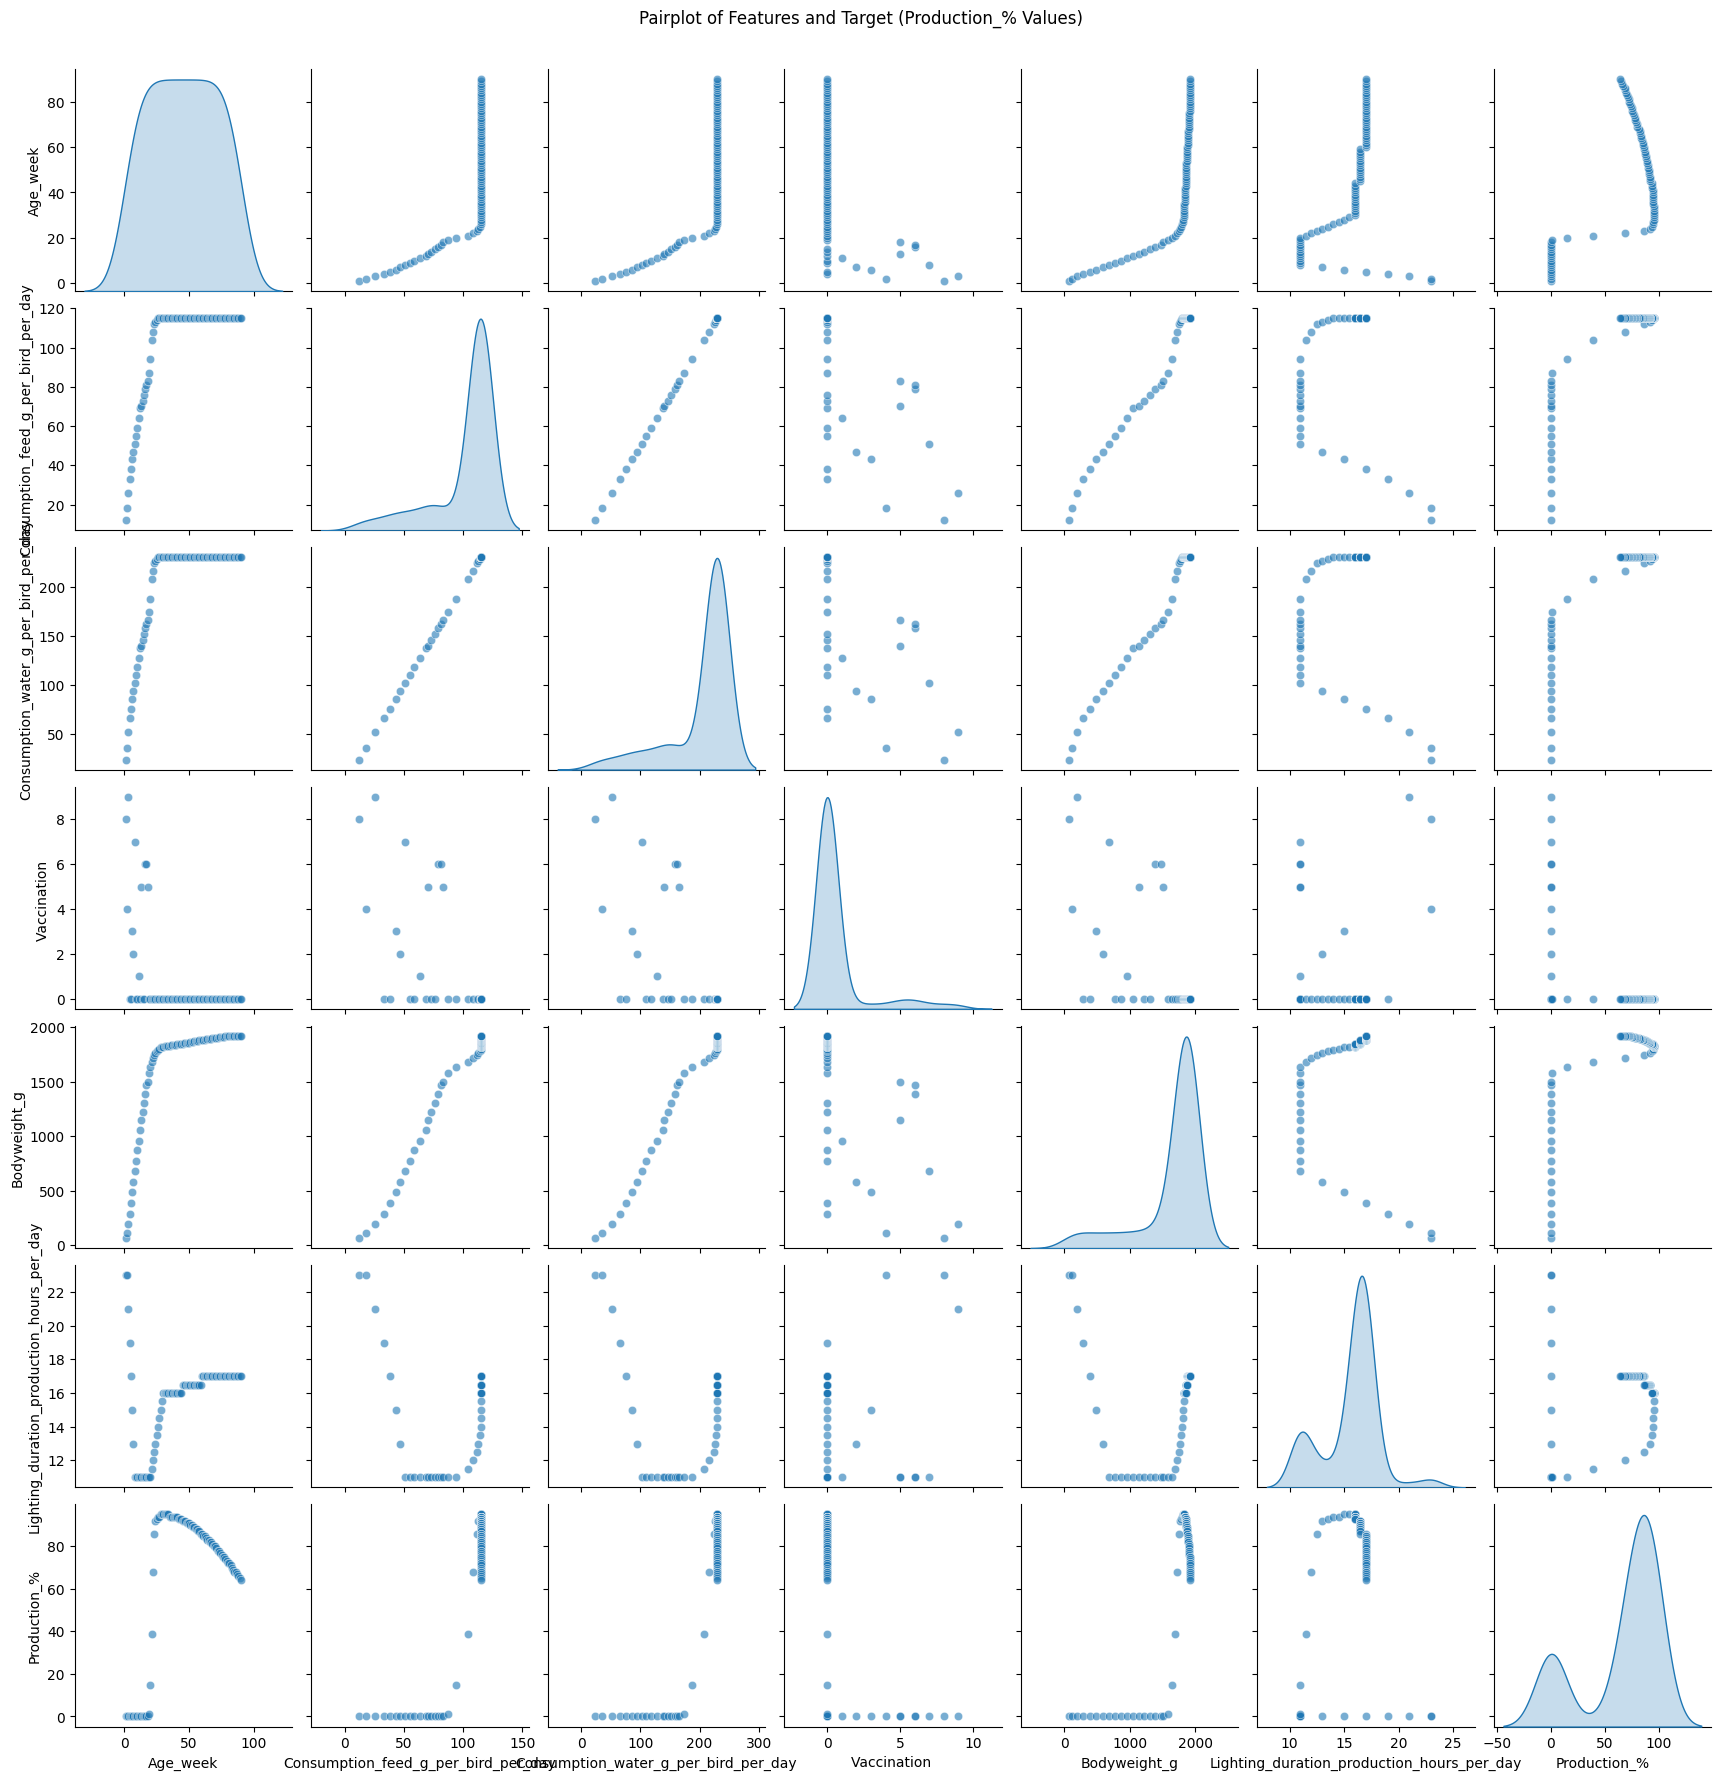

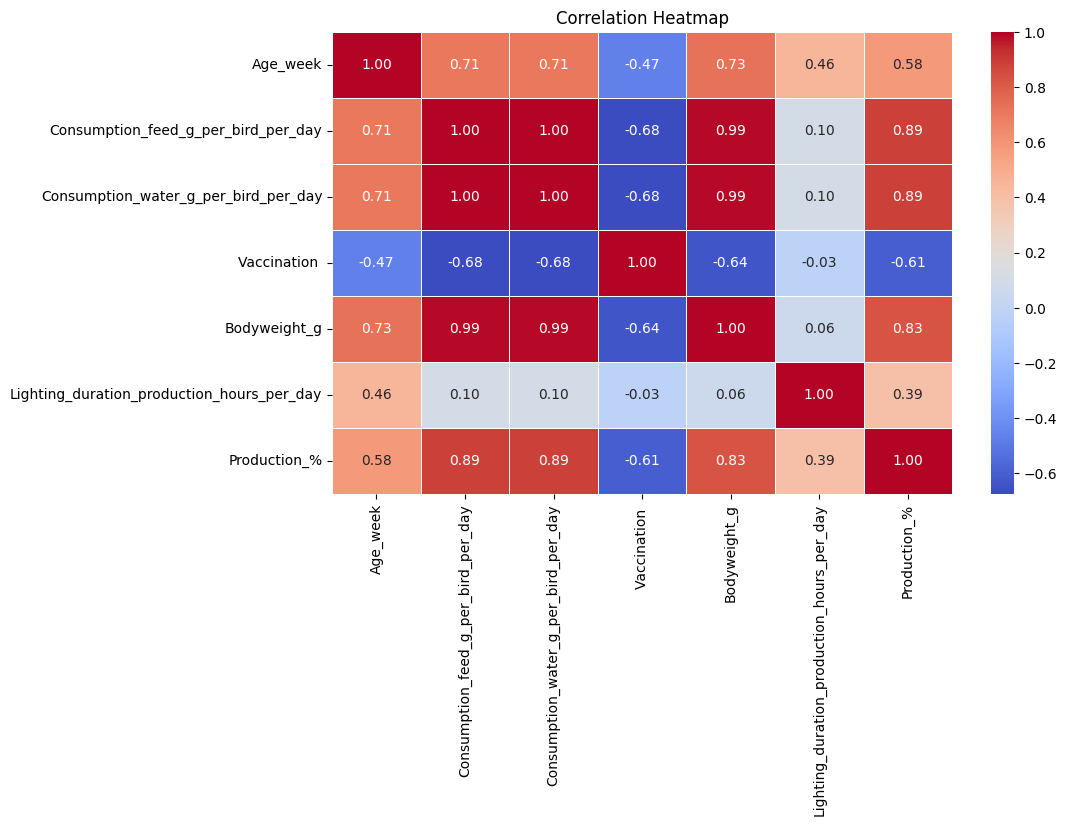

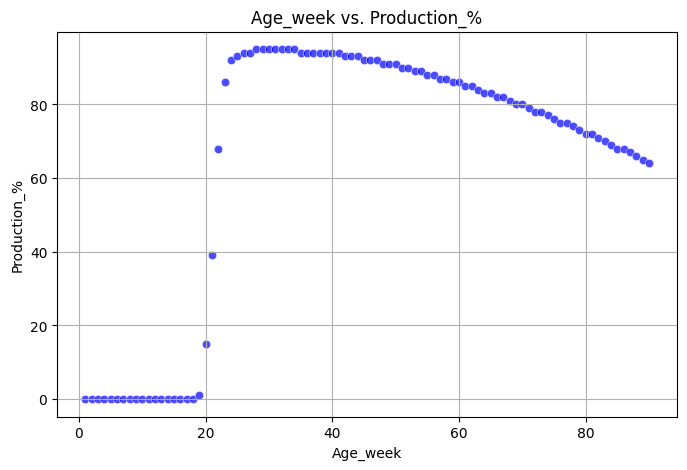

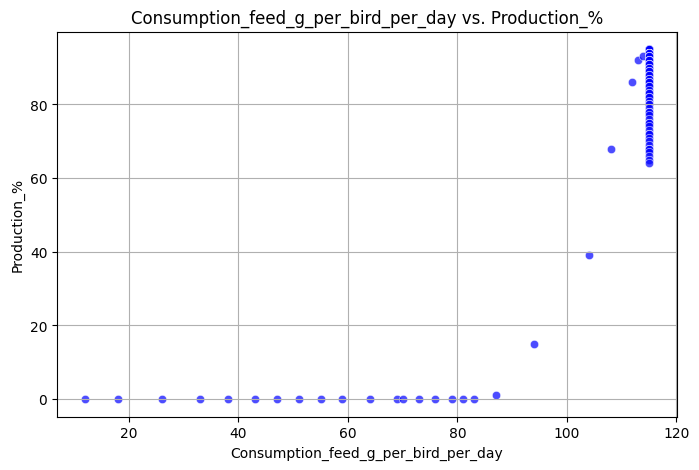

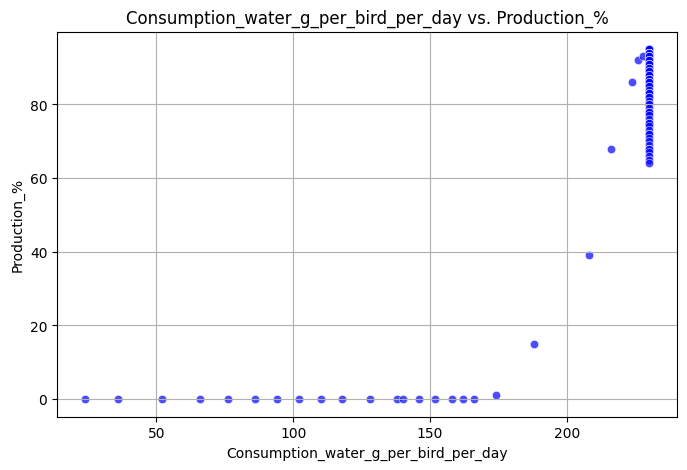

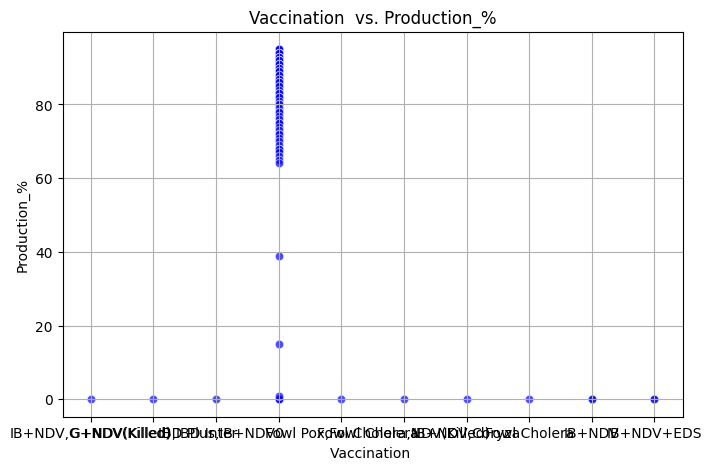

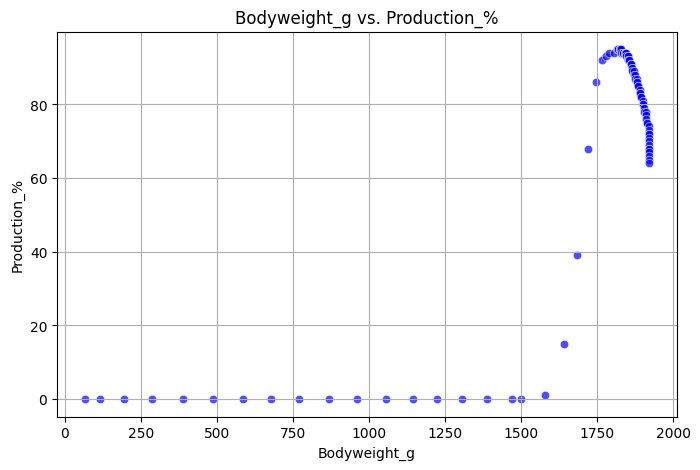

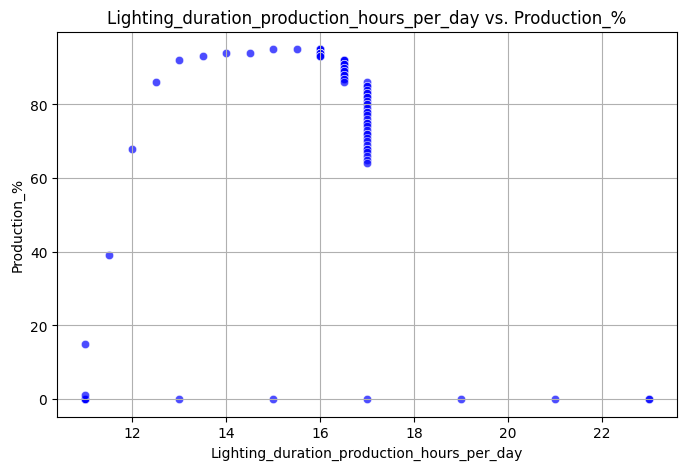

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Function to visualize training data vs target values with categorical conversion
def visualize_train_data_with_categoricals(dataset_path):
    try:
        if not os.path.exists(dataset_path):
            raise FileNotFoundError(f"Dataset not found at {dataset_path}")

        # Load the dataset
        dataset = pd.read_csv(dataset_path)

        if 'Production_%' not in dataset.columns:
            raise KeyError("The column 'Production_%' is missing from the dataset.")

        # Feature and target separation
        X = dataset.drop(columns=['Production_%'])
        y = dataset['Production_%']

        # Convert categorical columns to numeric
        categorical_columns = X.select_dtypes(include=['object']).columns
        for col in categorical_columns:
            X[col] = X[col].astype('category').cat.codes

        # Combine X and y for visualization
        data_combined = pd.concat([X, y], axis=1)

        # Pairplot to visualize relationships
        sns.pairplot(data_combined, diag_kind='kde', plot_kws={'alpha': 0.6})
        plt.suptitle("Pairplot of Features and Target (Production_% Values)", y=1.02)
        plt.show()

        # Correlation heatmap
        plt.figure(figsize=(10, 6))
        correlation_matrix = data_combined.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title("Correlation Heatmap")
        plt.show()

        # Individual feature vs. Production_% scatter plots
        for feature in X.columns:
            plt.figure(figsize=(8, 5))
            sns.scatterplot(x=dataset[feature], y=y, alpha=0.7, color='blue')
            plt.title(f"{feature} vs. Production_%")
            plt.xlabel(feature)
            plt.ylabel("Production_%")
            plt.grid(True)
            plt.show()

    except Exception as e:
        print(f"Error during visualization: {e}")
        raise

# Example usage
dataset_path = '/content/Standard_for_all_dataset.csv'

# Visualize the training data
visualize_train_data_with_categoricals(dataset_path)
